<a href="https://colab.research.google.com/github/reza-chehreqani/Artificial-Intelligence/blob/main/Assignments/Assignment%202/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Reza Chehreghani
# Student ID: 810101401
# University of Tehran

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_dir = '/content/drive/MyDrive/Artificial Intelligence/Assignment 2/810101401, Reza, Chehreghani' + '/'

#Part I - The K-Nearest Neighbors (KNN) Algorithm

## Explanation

The KNN model is a supervised machine learning model. The KNN model is also one of the simpler models.

### Mathematical Definition of Nearest Neighbors

The definition of nearest neighbors is based on the computation of the Euclidean distance from the new data point to each of the existing data

$$ d(p,q) = \sqrt {{{({p_1} - {q_1})}^2} + {{({p_2} - {q_2})}^2} + ...{{({p_n} - {q_n})}^2}}$$

When we use the KNN algorithm, we need to identify the closest neighbors. Once we have identified the k neighbors that are closest to our new data point, we do not yet have a prediction. There is one step remaining to convert the multiple neighbors into one prediction. There are two prevalent methods for it.

1. The first method is to take the average of the target value of the k nearest neighbors. This average is then used as the prediction.

2. The second method is to take the weighted average of the k nearest neighbors and use their distances as the inverse weight so that closer points are weighted heavier in the prediction.

### Deciding on the Number of Neighbors k

How many nearest neighbors should we include in the prediction? The value of k decides this. To apply this, let us see two cases – one nearest neighbor and three nearest neighbors – and see the difference in prediction. The two are given in the figure below

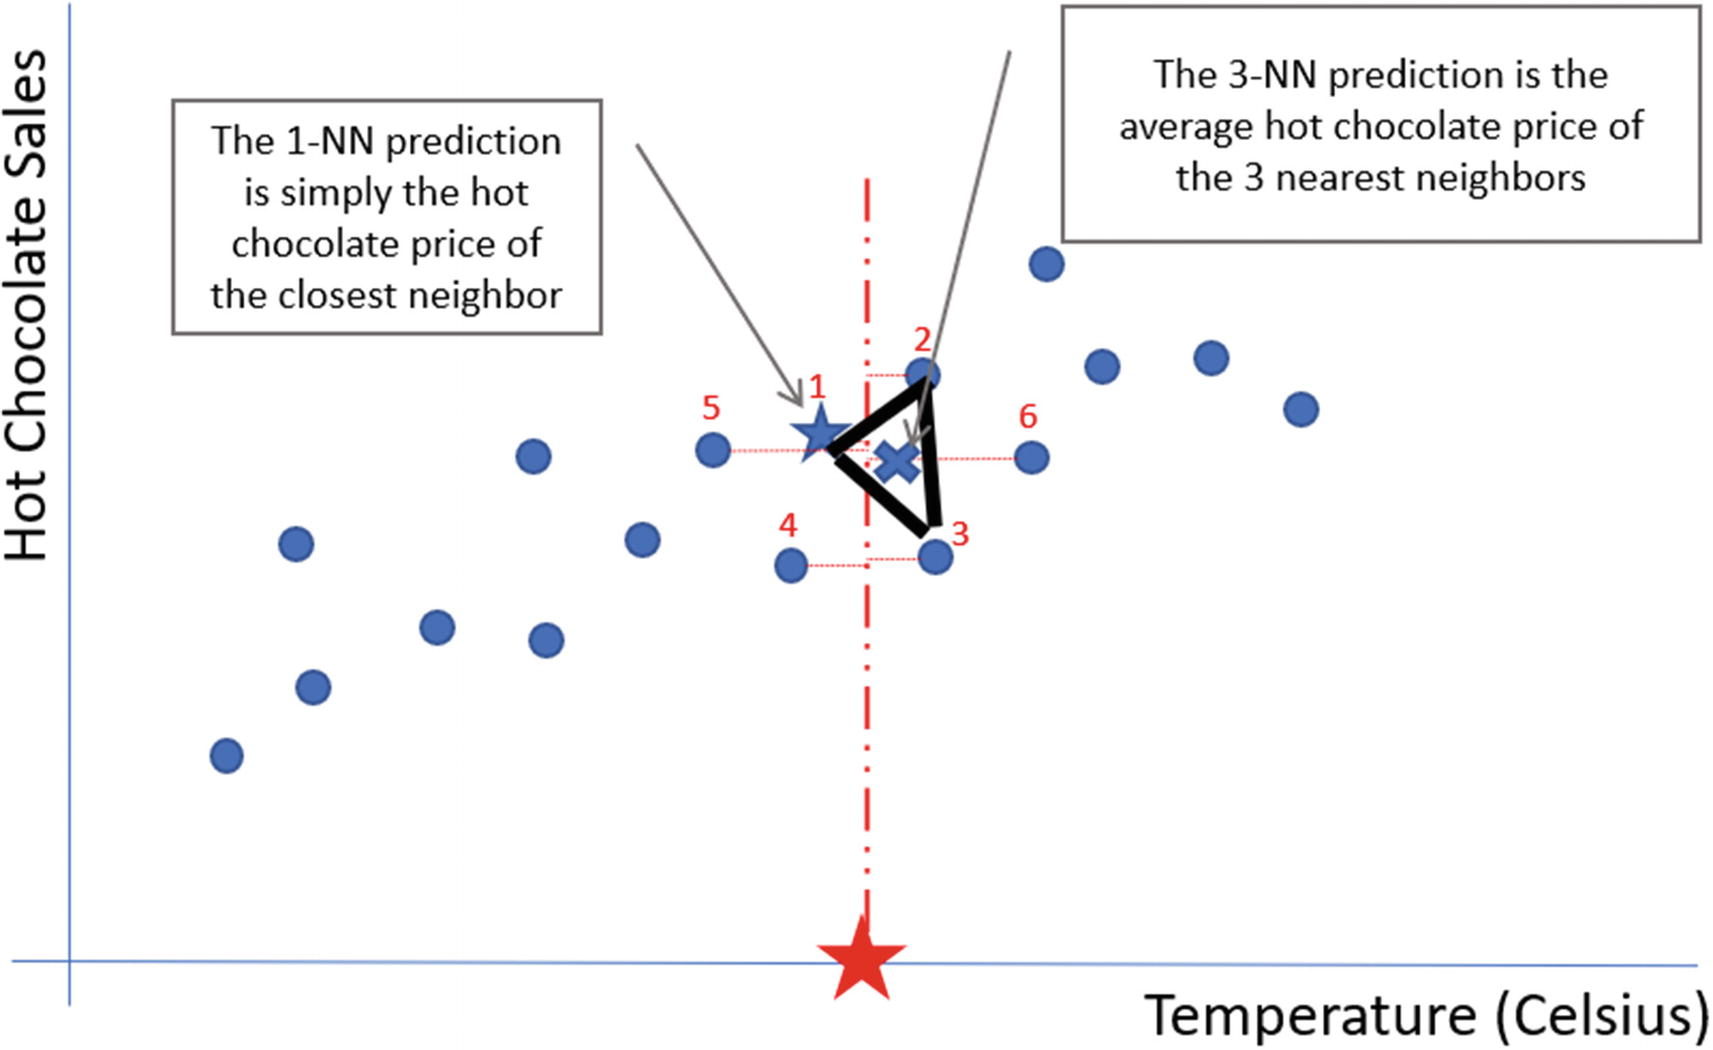

## Example

To discuss the numerical example of N-Nearset Neighbors Regression, we will use the following dataset.

| Length | Weight | Cost |
|---|---|---|
| 10 | 15 | 45 |
| 11 | 6  | 37 |
| 12 | 14 | 48 |
| 7	 | 9  | 33 |
| 9	 | 14 | 38 |
| 8	 | 12 | 40 |
| 6	 | 11 | 35 |
| 15 | 10 | 50 |
| 14 | 8  | 46 |
| 7	 | 12 | 35 |
| 10 | 6  | 36 |
| 13 | 8  | 44 |
| 9	 | 7  | 32 |
| 5	 | 8  | 30 |
| 5	 | 10 | 30 |

In the above dataset, we have 15 data points. The dataset contains the length and weight of metal rods along with their cost. Now, suppose that we want to calculate the cost for a rod with a length of 7 and a weight of 8. For this, we will use the following steps.

First, we will decide on the value of K. We will take 3 as the number of closest neighbors used to decide the cost of the input data point.

Next, we will calculate the distance of the new data point i.e. (7, 8) to all the existing points in the dataset. Here, we will use the euclidean distance measure. I have tabulated the distances in the below table.

| Point	| Distance from (7,8) |
|---|---|
| (10, 15) | 7.61 |
| (11, 6)  | 4.47 |
| (12, 14) | 7.81 |
| (7, 9)   | 1.0  |
| (9, 14)  | 6.32 |
| (8, 12)  | 4.12 |
| (6, 11)  | 3.16 |
| (15, 10) | 8.24 |
| (14, 8)  | 7.0  |
| (7, 12)  | 4.0  |
| (10, 6)  | 3.60 |
| (13, 8)  | 6.0  |
| (9, 7)   | 2.23 |
| (5, 8)   | 2.0  |
| (5, 10)  | 2.82 |

Now, we have found the distance of all the data points in the dataset from the point (7, 8). Next, we have to find the three closest points in the dataset. For this, we will sort the points according to their distances from (7, 8). The result is tabulated below.

| Point	| Distance from (7, 8) |
|---|---|
| (7, 9)   | 1    |
| (5, 8)   | 2    |
| (9, 7)   | 2.23 |
| (5, 10)  | 2.82 |
| (6, 11)  | 3.16 |
| (10, 6)  | 3.6  |
| (7, 12)  | 4    |
| (8, 12)  | 4.12 |
| (11, 6)  | 4.47 |
| (13, 8)  | 6    |
| (9, 14)  | 6.32 |
| (14, 8)  | 7    |
| (10, 15) | 7.61 |
| (12, 14) | 7.81 |
| (15, 10) | 8.24 |

In the above table, you can observe that the three points closest to  (7, 8) are (7, 9), (5, 8), and (9, 7). These points have costs of 33, 30, and 32.

To calculate the cost of a rod with length 7 and weight 8, we can take the average of the above costs. Hence, the cost for (7, 8) will be 31.67.

Thus, we have found the cost of the rod using the given dataset and the KNN regression algorithm in this numerical example.

source: https://codinginfinite.com/knn-regression-numerical-example/

## Model

###1. Import libraries.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

### 2. Import the traffic data.

In [ ]:
data = pd.read_csv(project_dir + 'Metro_Interstate_Traffic_Volume.csv')
data.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

### 3. The seasonality variables are necessary for the modeling here. We create Year, Month, Weekday, Hour, IsHoliday.

In [ ]:
data['year'] = data['date_time'].apply(lambda x: x[:4])
data['month'] = data['date_time'].apply(lambda x: x[5:7])
data['weekday'] = pd.to_datetime(data['date_time']).apply(lambda x: x.weekday())
data['hour'] = pd.to_datetime(data['date_time']).apply(lambda x: x.hour)
data['isholiday'] = (data['holiday'] == 'None').apply(float)
data.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  year month  \
0    scattered clouds  2012-10-02 09:00:00            5545  2012    10   
1       broken clouds  2012-10-02 10:00:00            4516  2012    10   
2     overcast clouds  2012-10-02 11:00:00            4767  2012    10   
3     overcast clouds  2012-10-02 12:00:00            5026  2012    10   
4       broken clouds  2012-10-02 13:00:00            4918  2012    10   

   weekday  hour  isholiday  
0        1     9        0.0  
1        1    10        0.0  
2        1    11        0.0  
3        1    12        0.0  
4        1    13        0.0

In [ ]:
data['isholiday'].sum()

0.0

In [ ]:
data['isholiday'] = data['holiday'].isna().apply(float)


### 4A. Feature engineering to create the additional explanatory variables.
### 4B. Split the data into train and test and fit a default KNN model.
### 4C. Obtain the R2


In [ ]:
X = data[['year', 'month', 'weekday', 'hour', 'isholiday']]
y = data['traffic_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=12345, shuffle=False)
my_dt = KNeighborsRegressor()
my_dt.fit(X_train, y_train)
fcst = my_dt.predict(X_test)
print(r2_score(list(y_test), list(fcst)))

0.970238265560862


Coefficient of determination \\
$R^2 = \frac{SSR}{SST}$

Sum of Squared Regression \\
$SSR = \sum_{i} (\hat{y_i} - \bar{y})^2$

Sum of Squared Total \\
$SST = \sum_{i} (y_i - \bar{y})^2$

### 5. Verify our results visually.

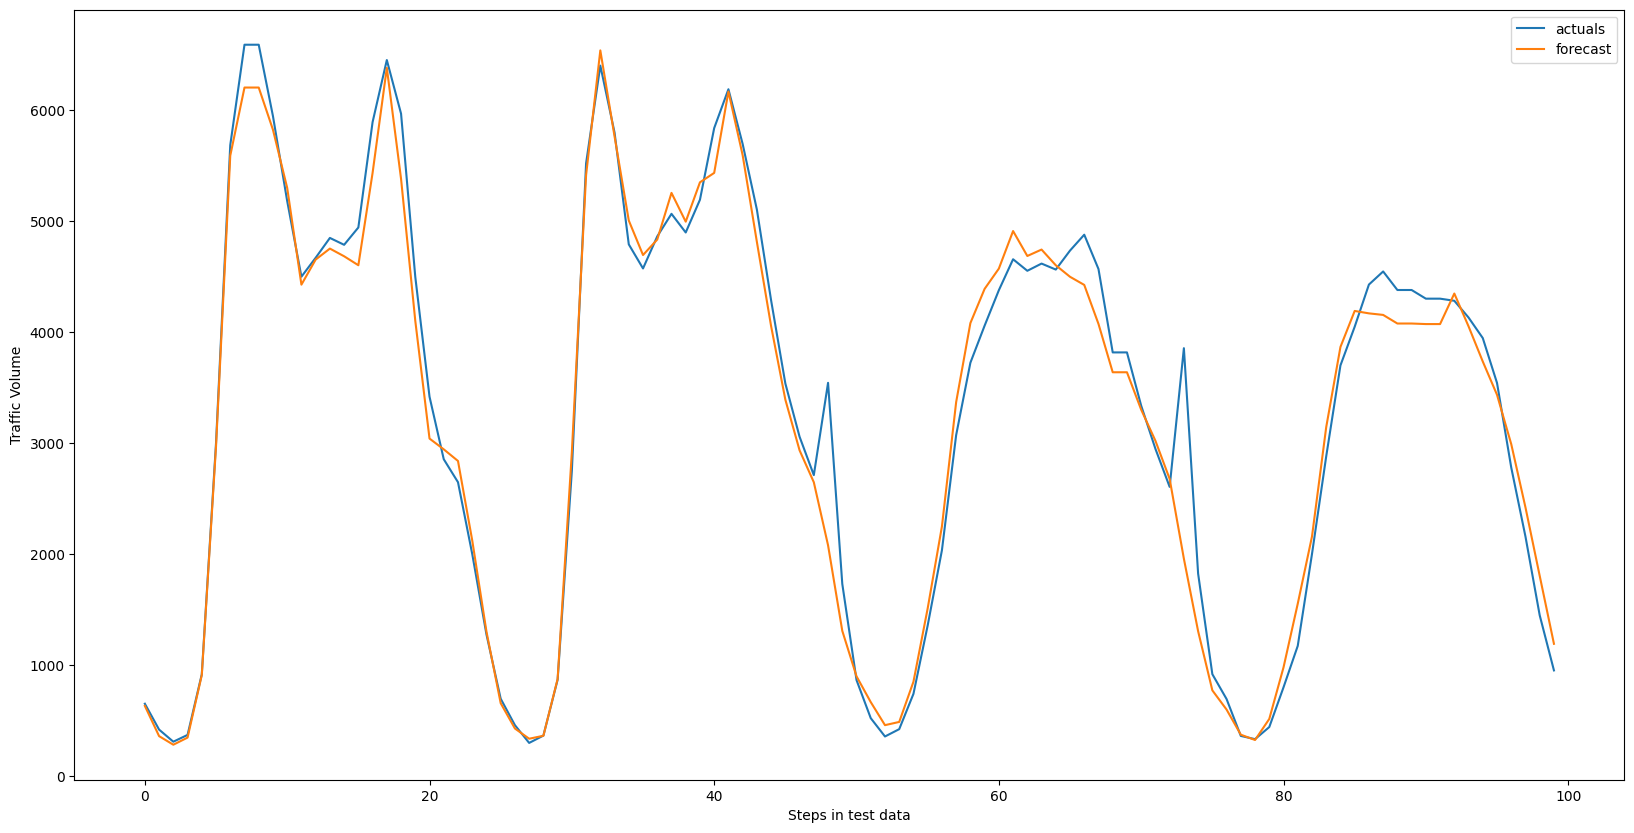

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(list(y_test))
plt.plot(list(fcst))
plt.legend(['actuals', 'forecast'])
plt.ylabel('Traffic Volume')
plt.xlabel('Steps in test data')
plt.show()

# Part II - Support Vector Machines Algorithm

## Explanation

1. The fundamental idea behind Support Vector Machines is to fit the largest possible street/margin between the decision boundary that separates the two classes and the training instances. When performing soft margin classification, the SVM searches for a compromise between perfectly separating the two classes and having the widest possible margin. Another key idea is to use kernels when training on nonlinear datasets.

2. The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector (i.e., is off the street/margin) has no influence whatsoever; you could remove them, add more instances, or move them around, and as long as they stay off the street, they will not affect the decision boundary. Computing the predictions only involve the support vectors, not the whole training set.

3. SVMs will fit the largest possible “street” between the classes (see the first answer), so if the training set is not scaled, the SVM will tend to neglect small features (see Figure below this cell).

4. The SVM classifier can output the distance between the test instance and the decision boundary. We can use this as a confidence score. However, this score cannot be directly converted into an estimation of the class probability. If you set probability=True when creating an SVM in Scikit-Learn, then after training, it will calibrate the probabilities using Logistic Regression on the SVM’s scores (trained by an additional five-fold cross-validation on the training data). This will add the predict_proba() and predict_log_proba() methods to the SVM.

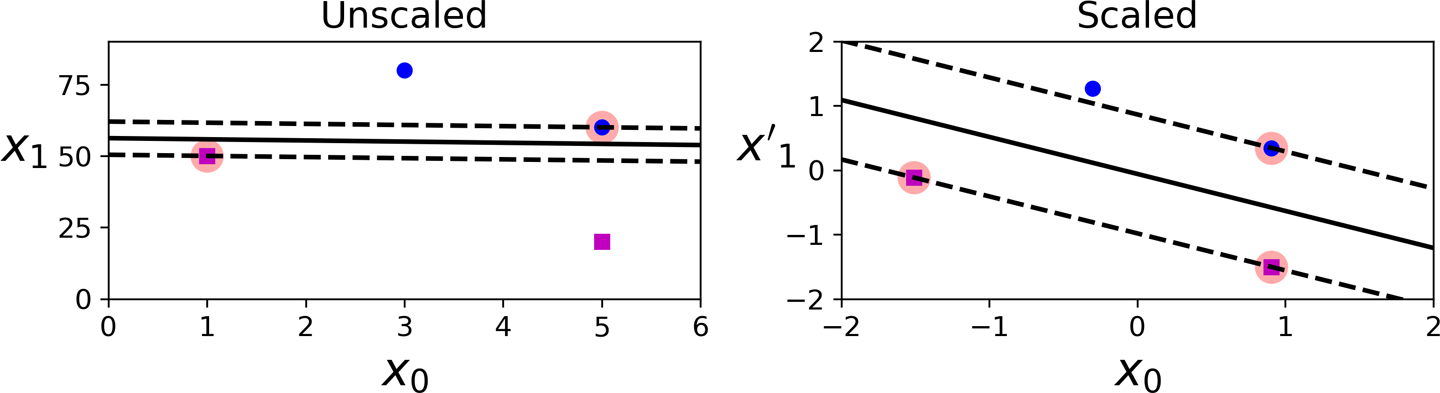

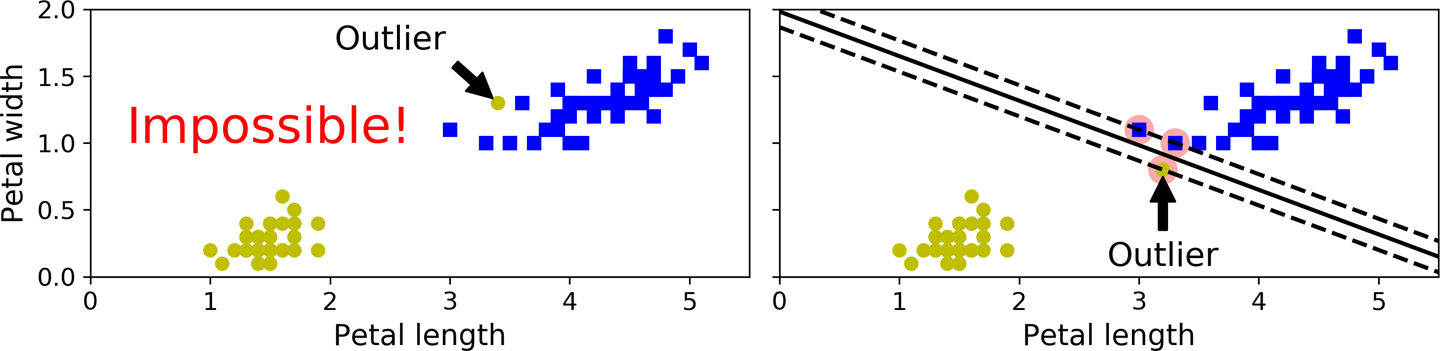

### Soft Margin Classification

If we strictly impose that all instances must be off the street and on the right side, this is called hard margin classification. There are two main issues with hard margin classification. First, it only works if the data is linearly separable. Second, it is sensitive to outliers. The above figure(SVM-1) shows the iris dataset with just one additional outlier: on the left, it is impossible to find a hard margin; on the right, the decision boundary ends up very different from the one in the Figure below (SVM-2) without the outlier, and it will probably not generalize as well. To avoid these issues, we use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side). This is called soft margin classification.

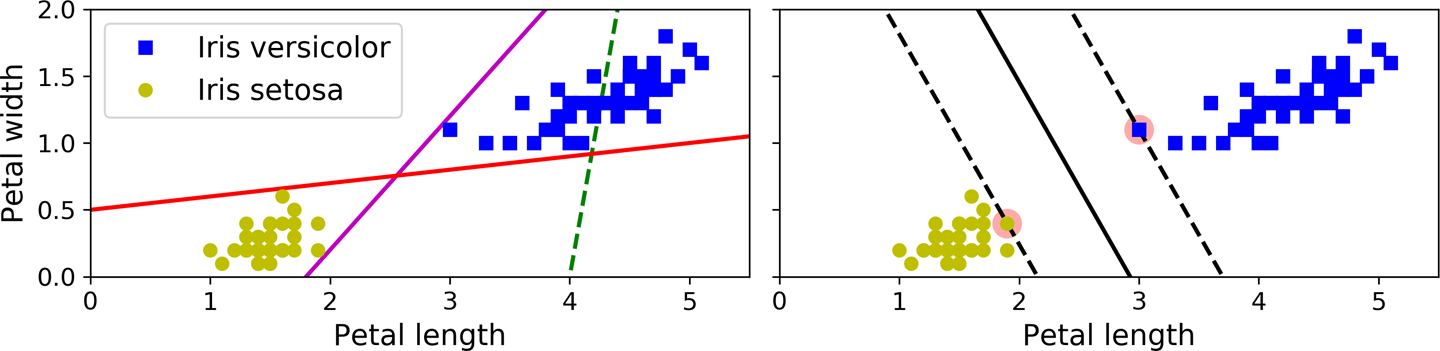

### Nonlinear SVM Classification

Although linear SVM classifiers are efficient and work  well in many cases, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features. In some cases, this can result in a linearly separable dataset. Consider the left plot in Figure 5-5: it represents a simple dataset with just one feature, ${x_1}$.This dataset is not linearly separable( Figure below=SVM-3). But if you add a second feature  ${x_2} = {({x_1})^2}$ , the resulting 2D dataset is perfectly linearly separable.

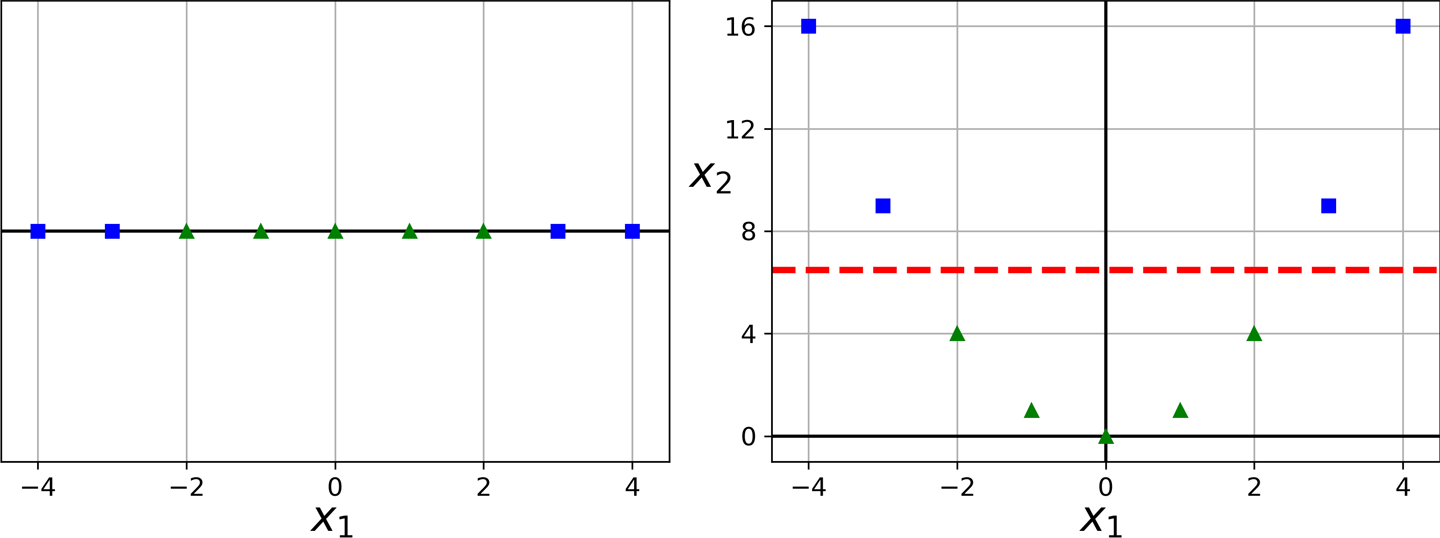

## Example

Consider the following plot: it represents a simple dataset with just one feature, $x_1$. This dataset is not linearly separable, as you can see.

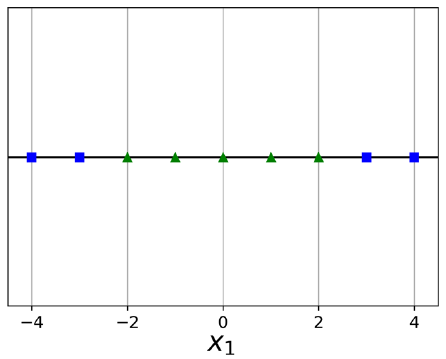

Technique is to add features computed using a *similarity function*, which measures how much each instance resembles a particular *landmark*. In this example, let's add two landmarks at $x_1 = –2$ and $x_1 = 1$.

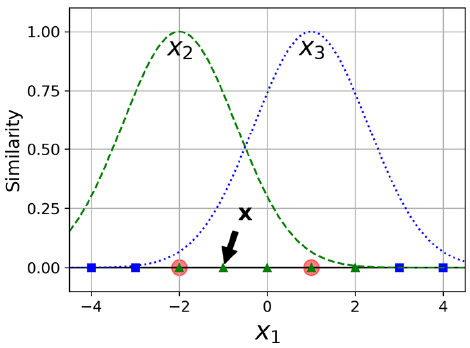

Next, let’s define the similarity function to be the Gaussian *Radial Basis Function* (RBF) with $γ = 0.3$.

$Gaussian \: RBF: \: ϕ_γ(x, l) = exp(−γ∥ x − l ∥^2)$

This is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark). Increasing $γ$ makes the bell-shaped curve narrower. As a result, each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small $γ$
value makes the bell-shaped curve wider: instances have a larger range of influence, and the decision boundary ends up smoother. So $γ$ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it; if it is underfitting, you should increase it.

Now we are ready to compute the new features. For example, let’s look at the instance $x_1 = –1$: it is located at a distance of 1 from the first landmark and 2 from the second landmark. Therefore its new features are $x_2 = exp(–0.3 × 12) ≈ 0.74$ and $x_3 = exp(–0.3 × 22) ≈ 0.30$. The following plot shows the transformed dataset (dropping the original features). As you can see, it is now linearly separable.

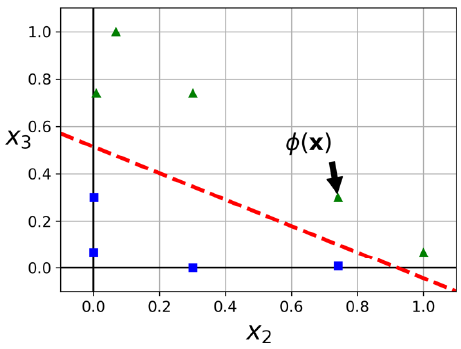

But,  how to select the landmarks. The simplest approach is to create a landmark at the location of each and every instance in the dataset. Doing that creates many dimensions and thus increases the chances that the transformed training set will be linearly separable. The downside is that a training set with $m$ instances and $n$ features gets transformed into a training set with $m$ instances and $m$ features (assuming you drop the original features). If your training set is very large, you end up with an equally large number of features.

source: Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow

## Model 1

### 1.Import libraries.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### 2. We load our data.

In [ ]:
dataset = load_iris()
data = dataset.data
target = dataset.target

### 3. We perform preprocessing on our data.

In [ ]:
sc = StandardScaler()
data_normalized = sc.fit_transform(data)

### 4. We do train test split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_normalized, target, random_state=42, test_size=0.15)

### 5. We train our model.

In [ ]:
model = SVC()
model.fit(X_train,y_train)

SVC()

### 6. We compute the accuracy score on our test data.

In [ ]:
accuracy_score(y_test, model.predict(X_test))

1.0

## Model 2

### 1.Import libraries.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
# warnings.filterwarnings('ignore')

### 2. We load our data.

In [ ]:
titanic = pd.read_csv(project_dir + 'final_dataset_ready.csv')
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    1  22.0      1      0   7.2500           0           0   
1         1       1    0  38.0      1      0  71.2833           1           0   
2         1       3    0  26.0      0      0   7.9250           0           0   
3         1       1    0  35.0      1      0  53.1000           0           0   
4         0       3    1  35.0      0      0   8.0500           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [ ]:
dataset = titanic.copy()
X = np.asarray(dataset.drop('Survived', axis=1))
y = np.asarray(dataset['Survived'])
y[y==0] = -1
print(X.shape)
print(y[0:10])

(891, 9)
[-1  1  1  1 -1 -1 -1 -1  1  1]


### 3. We do train test split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape,y_test.shape)

(712, 9)
(179, 9) (179,)


### 4. We perform preprocessing on our data.

In [ ]:
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

### 5. We train our model.

In [ ]:
svmModel = SVC(kernel = 'rbf',C=2,gamma = 0.9)
svmModel.fit(X_train_normalized,y_train)

SVC(C=2, gamma=0.9)

### 6. We use our model to predict our test data.

In [ ]:
Y_pred = svmModel.predict(X_test_normalized)
print(round(accuracy_score(y_test, Y_pred)*100,2))

80.45


# Part III - The Gradient-Boosting Algorithm

## Explanation

Gradient-Boosted Tree (GBT) is another tree-based ensemble algorithm similar to Random Forest. GBTs use a technique known as boosting to create a strong learner from weak learners (shallow trees). GBTs train an ensemble of decision trees sequentially, with each succeeding tree decreasing the error of the previous tree. This is done by using the residuals of the previous model to fit the next model. This residual-correction process is performed a set number of iterations with the number of iterations determined by cross-validation until the residuals have been fully minimized.

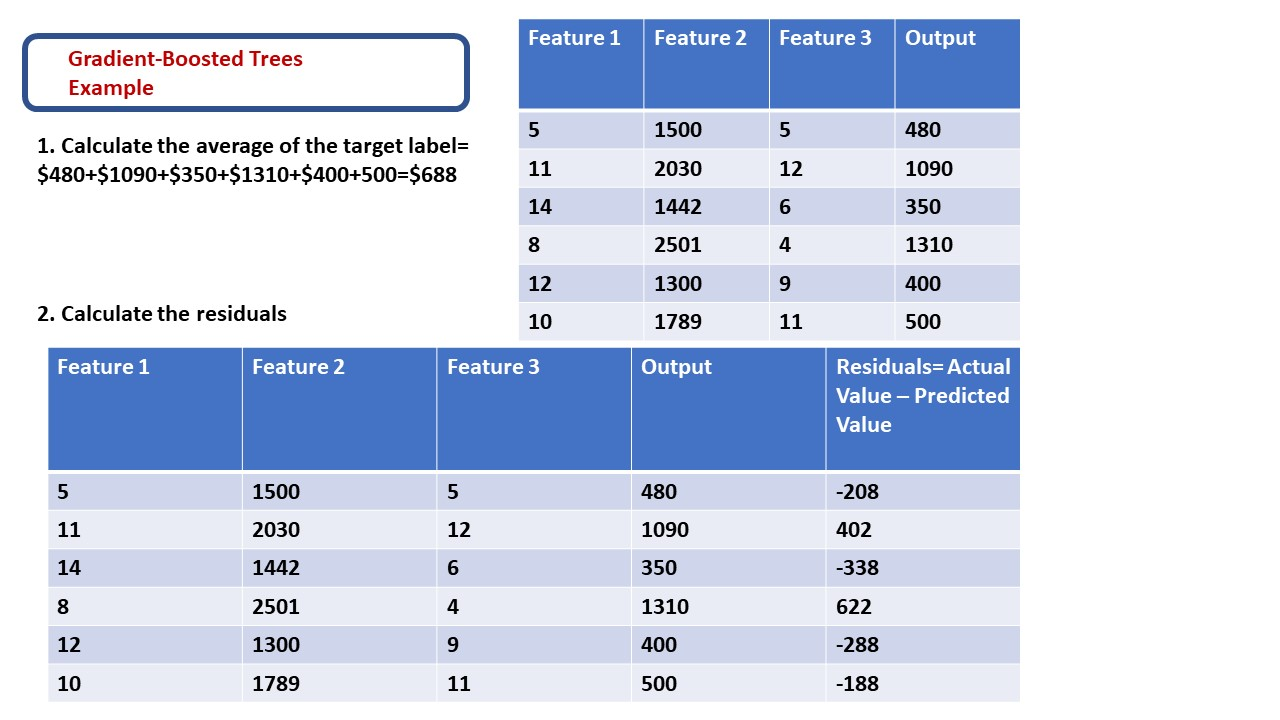

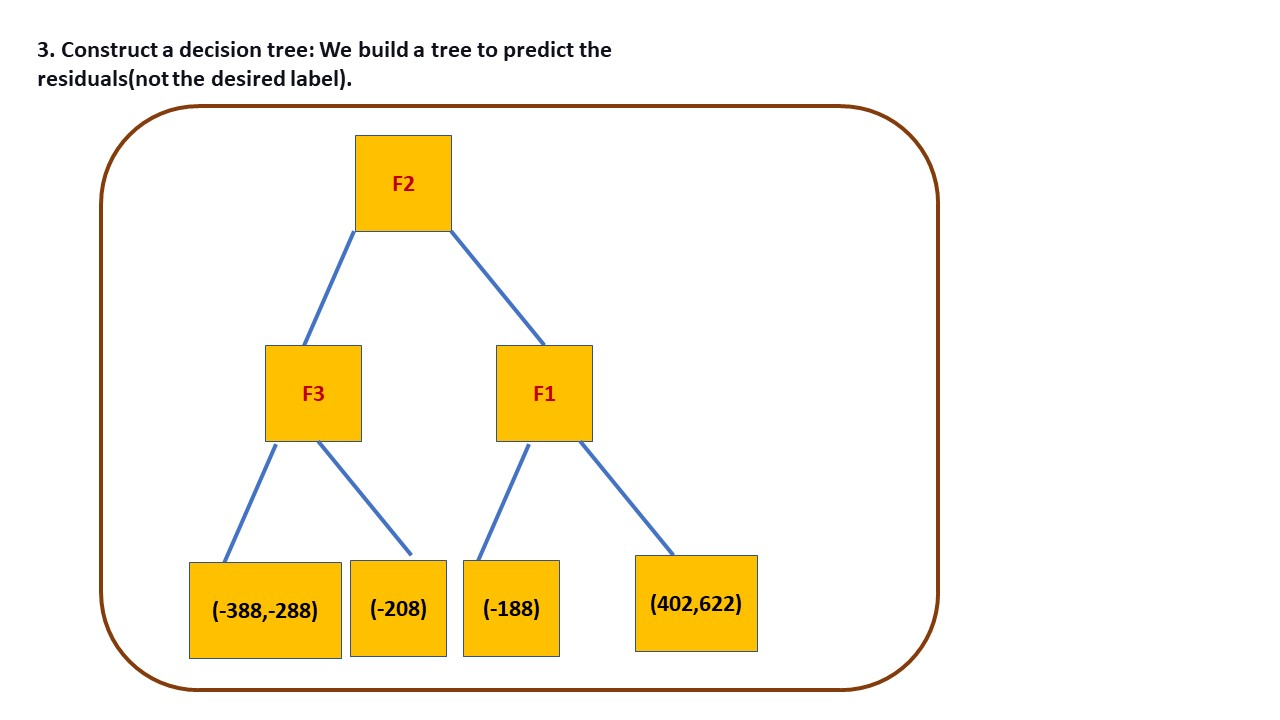

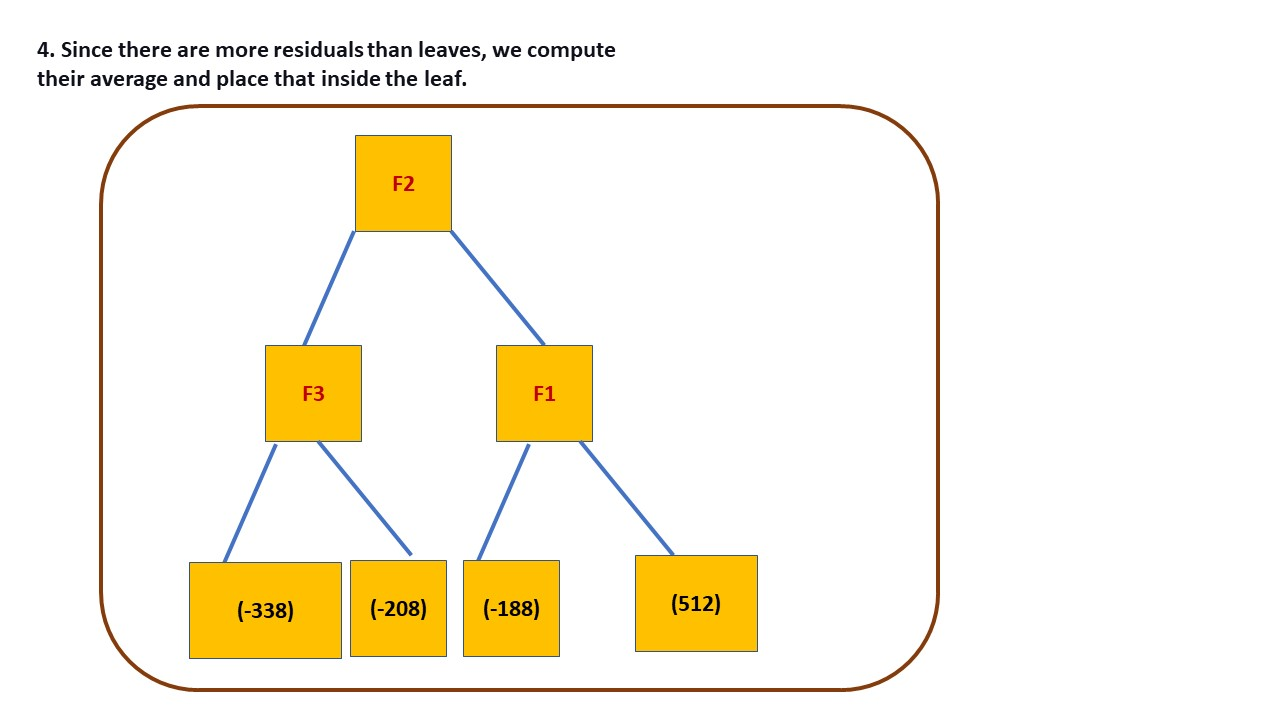

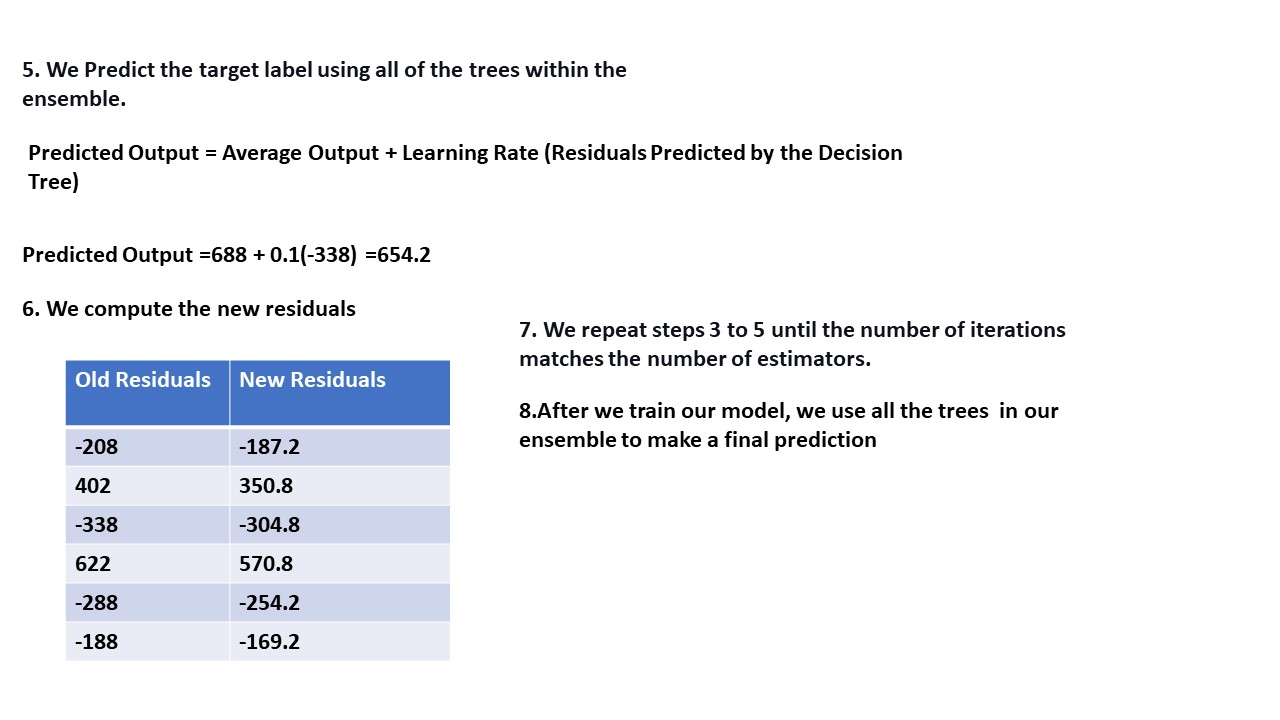

## Example

Let's sea how the most commom **Gradiant Boost** configuration would use this **Training Data** to **Predict Weight**.

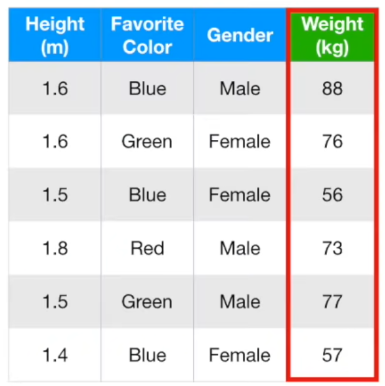

The first thing we do is calculate the average **Weight**.

$Average \: Weight =\frac{88+76+56+73+77+57}{6}=71.2$

This is the first attempt at predicting everyone's weight. In other words, if we stop right now, we would predict that everyone **Weighted 71.2** kg. However, **Gradient Boost** doesn't stop here.

The next thing we do is build a tree based on the errors from the first tree (We assume that the average weight is our first tree). The errors that the previous tree made are the differeneces between the **Observed Weights** and the **Predicted Weight, 71.2**.

$Residual = Observed \: Weight - Predicted \: Weight$

So let's start by plugging in **71.2** for the **Predicted Weight** and then plug in the first **Observed Weight**.

$Residual = 88 - 71.2 = 16.8$

Now do the same thing for the remaining **Weights**.

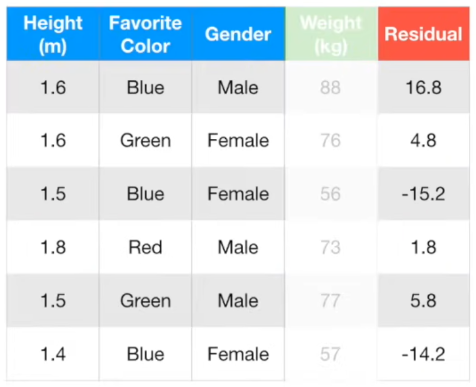

Now we build a **Tree**, using **Hieght**, **Favorite Color**, and **Gender** to **Predict** the **Residuals**.

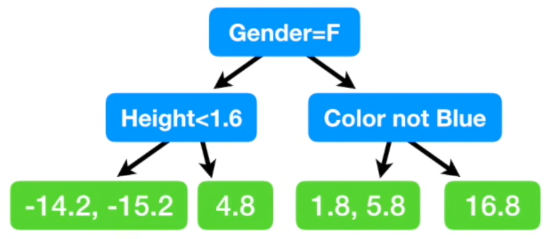

By restricting the total number of leaves, we get fewer leaves than **Residuald**. As a result, some rows of data go to the same leaf. So we replace this residuals with their average.

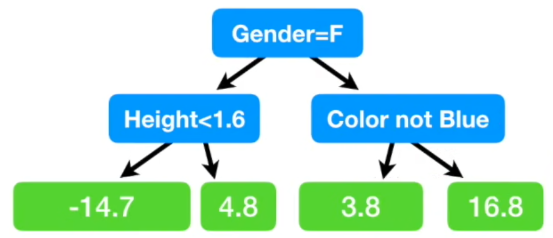

Now we can combine the orginal leaf to make a new **Prediction** of an individual's **Weight**.

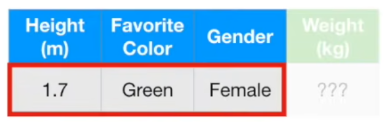

We start with the initial **Prediction, 71,2** then we run the data down the tree and we get **4.8**. **Gradient Boost** uses a **Learning Rate** to scale the contribution from the new tree that results in a small step in the right direction. The **Learining Rate** is a value between **0** and **1**. In this case, we'll set the **Learning Rate** to **0.1**.

$Predicted \: Weight = 71.2 + (0.1 × 4.8) = 71.68$

So let's build another tree so we can take another small step in the right direction. Just like before, we calculate the **Residuals**, the difference between the **Observed Weights** and our latest **Predictions**. So we plug in the **Observed Weight** and the new **Predicted Weight**.

$Residual = 88 - (71.2 + 0.1 ×16.8) = 15.1$

Then we repeat for all of the other individuals in the **Training Dataset**.

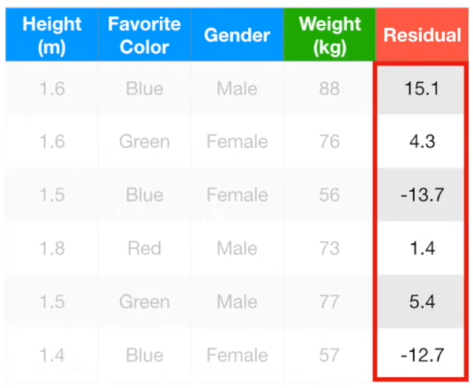

**Note:** The new **Residuals** are all smaller than before, so we've taken a small step in the right direction.

Now let's build a new tree to predict the new **Residuals**.

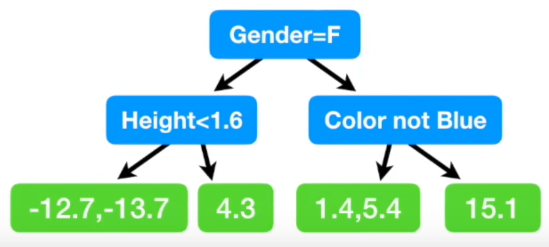

**Note:** In this simple example the braches are the same as before. However, in practice, the trees can be differnet each time.

Just like before, since multiple samples ended up in the same leaves, we just replace the **Residuals** with their averages.

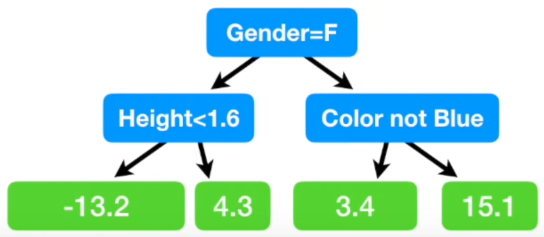

Now we combine the new **Tree** with the previous **Tree** and the initial **Leaf**.

**Note:** We scale all of the **Trees** by the **Learning Rate**, which we set to **0.1** and add everything together.

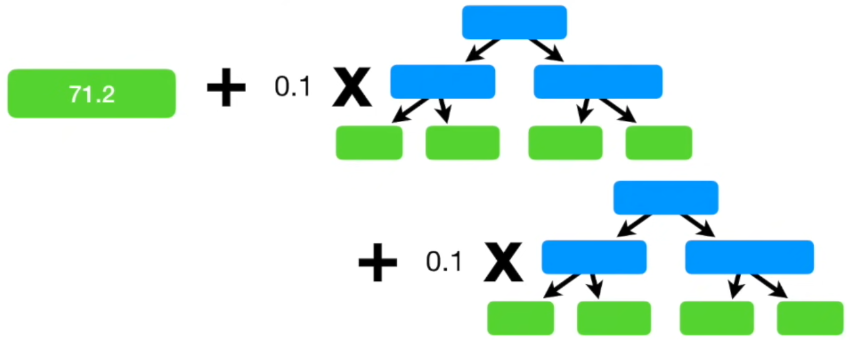

Now we're ready to make a new **Prediction**.

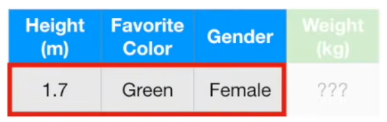

Just like before, we start with the initial **Prediction** then add the scaled amount from the first **Tree** and the scaled amount from the second **Tree**. That gives us

$Predicted \: Weight = 71.2 + (0.1 × 4.8) + (0.1 × 4.3) = 72.11$

Which is another small step. We keep making trees until we reach the maximum specified, or adding additionals trees does not significantly reduce the size of the **Residuals**.

source: https://statquest.org/

## Model

### 1.Import the necessary libraries for Gradient-Boosted Tree

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, parser='liac-arff')

In [ ]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)
X

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

### 2.We do train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 3. We use two nodes with three decision trees in GradientBoostingRegressor

In [ ]:
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

### 4. We compute the errors and the best estimators.

In [ ]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

In [ ]:
best_n_estimators

2

### 5. We use the best estimators and create our model.




In [ ]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,

    learning_rate=1.0
)
best_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2)

### 6. We predict our test set


In [ ]:
y_pred = best_regressor.predict(X_test)

### 7. compute the mean absolute error.

In [ ]:
mean_absolute_error(y_test, y_pred)

2.5984464953480604

# Part IV - Extreme Gradient Boosting(XGBoost)Algorithm

## Explanation

XGBoost is one of the best gradient-boosted tree implementations currently available. Released on March 27, 2014, by Tianqi Chen as a research project, XGBoost has become the dominant machine learning algorithm for classification and regression. XGBoost was designed using the general principles of gradient boosting, combining weak learners into a strong learner. But while gradient-boosted trees are built sequentially – slowly learning from data to improve its prediction in succeeding iteration, XGBoost builds trees in parallel.XGBoost produces better prediction performance by controlling model complexity and reducing overfitting through its built-in regularization. XGBoost uses an approximate algorithm to find split points when finding the best split points for a continuous feature. The approximate splitting method uses discrete bins to bucket continuous features, significantly speeding up model training. XGBoost includes another tree growing method using a histogram-based algorithm which provides an even more efficient method of bucketing continuous features into discrete bins. But while the approximate method creates a new set of bins per iteration, the histogram-based approach reuses bins over multiple iterations. This approach allows for additional optimizations that are not achievable with the approximate method, such as the ability to cache bins and parent and sibling histogram subtraction. To optimize sorting operations, XGBoost stores sorted data in in-memory units of blocks. Sorting blocks can be efficiently distributed and performed by parallel CPU cores. XGBoost can effectively handle weighted data via its weighted quantile sketch algorithm, can efficiently handle sparse data, is cache-aware, and supports out-of-core computing by utilizing disk space for large datasets, so data does not have to fit in memory.

## Example

**Note:** **XGBoost** was designed to be used with large, complicated data sets. However, to keep the example from getting out of hand, we will use this super simple **Training Data** consisting of **4** different **Drug Dosages**. The **Green Dots** indicate that the drug was **Effective** and the **Red Dots** indicate that the drug was **Not Effective**.

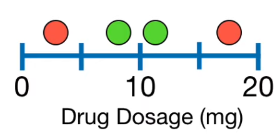

The very first step is fitting **XGBoost** to the **Training Data** is to make an initial prediction.

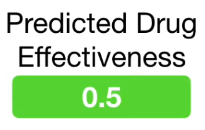

This prediction can be anything, for example, the **probability** of observing an effective dosage in the **Training Data**, but by default it is **0.5**, regardless of whether you are using **XGBoost** for **Regression** or **Classification**. In other words, regardless of the **Dosage**, the default prediction is that there is a **50%** chance the drug is **Effective**.

We can illustrate the initial prediction by adding a **y-axis** to our graph to represent the **Probability that the Drug is Effective** and drawing a **thick black line** at **0.5** to represent a **50%** chance that the drug is effective.

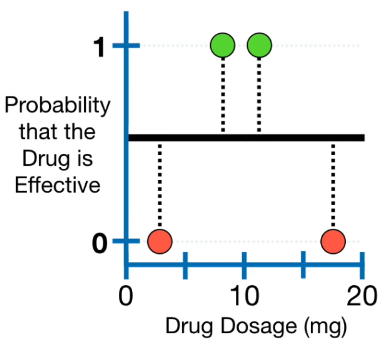

Since the **Green Dots** represent effective dosages, we will move them to the top of the graph, where the probability that the drug is effective is **1**. Also **Red Dots** represent ineffective dosages, so we will leave them at the bottom of the graph, where the probability that the drug is effective is **0**. The **Residuals**, the differences between the **Observed** and **Predeicted** values, show us how good the initial prediction is.

Now just like we did for **Gradient Boost**, we fit an **XGBoost Tree** to the **Residuals**. However, unlike **Gradient Boost**, **XGBoost** uses a unique **Classification Tree** that I call an **XGBoost Tree**. So let's talk about how to build an **XGBoost Tree** for **Classification**.

Each tree starts out as a single leaf and all of the **Residuals** go to the leaf.

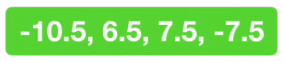

Now we calculate a **Quality Score**, or **Similarity Score**, for the **Residuals**.

$Similarity \: Score = \frac{(\sum Residual_i)^2}{\sum [Previous \: Probability_i × (1 - Previous \: Probability_i)] + λ}$

**Note:** $λ$ is a **Regularization** prameter, which makes leaves easier to prune.

Now we need to calculate a **Similarity Score** for the leaf.

$Similarity \: Score = \frac{(-0.5+0.5+0.5-0.5)^2}{\sum [Previous \: Probability_i × (1 - Previous \: Probability_i)] + λ}=0$

We will end up with **0** in the numerator and that makes the **Similarity Score = 0**.

Now we need to decide if we can do a better job clustering similar **Residuals** if we split them into two groups. We'll start with this threshold, **Dosage < 15**.

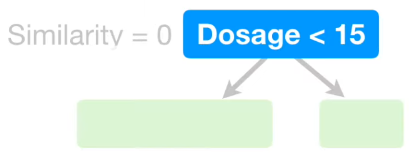

**Note:** we chose the threshold, **Dosage < 15**, because **15** is the average value between last **2** observations.

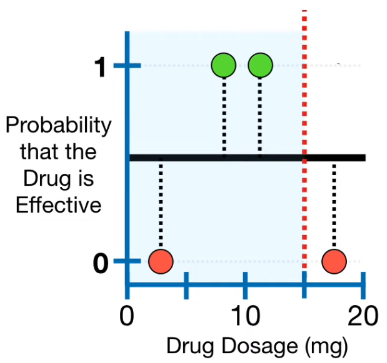

Thus, the three **Residuals** with **Dosage < 15** go to the leaf on the left and one **Residual** with **Dosage > 15** goes to the leaf on the right.

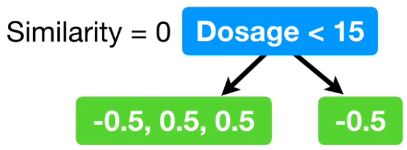

To calculate the **Similarity Score** for the three **Residuals** that end up in the leaf on the left, we plug the three **Residuals** into the numerator and, since we are building the first tree, the **Previous Probability** refers to the prediction from the initial leaf, so we plug in **0.5** for each **Residual** that end up in the left leaf. Just to keep things simple, we'll let $λ=0$.

$Similarity \: Score = \frac{(-0.5+0.5+0.5)^2}{(0.5 × (1 - 0.5)) + (0.5 × (1 - 0.5)) + (0.5 × (1 - 0.5)) + 0}=0.33$

The **Similarity Score** for the leaf on the right is 1, when $λ=0$.

$Similarity \: Score = \frac{(-0.5)^2}{0.5 × (1 - 0.5) + 0}=1$

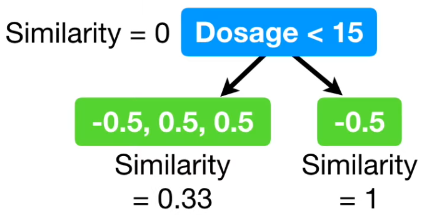

Now we need to quantify how much better the leaves cluster similar **Residuals** than the root. We do this by calculating the **Gain** of splitting the **Residuals** into two groups. **Gain** in equal to the **Similarity Score** for the leaf on the left, plus the **Similarity Score** for the leaf on the right, minus the **Similarity Score** for the root.

$Gain = Left_{Similarity} + Right_{Similarity} - Root_{Similarity} = 0.33 + 1 - 0 = 1.33$

So when we split the **Observation** based on the threshold **Dosage < 15**, **Gain = 1.33**. Since I don't have enough time, I'm going to tell you that no other threshold gives us a larger **Gain** value and that means **Dosage < 15** will be the first branch in out tree.

**Note:** We can tell just by looking at the data, **Dosage < 5** threshold, has a higher **Gain** than **Dosage < 10** threshold. Since we will use **Dosage < 5** as the threshold for the next branch.

$Gain = 1 + 2 - 0.33 = 2.66$

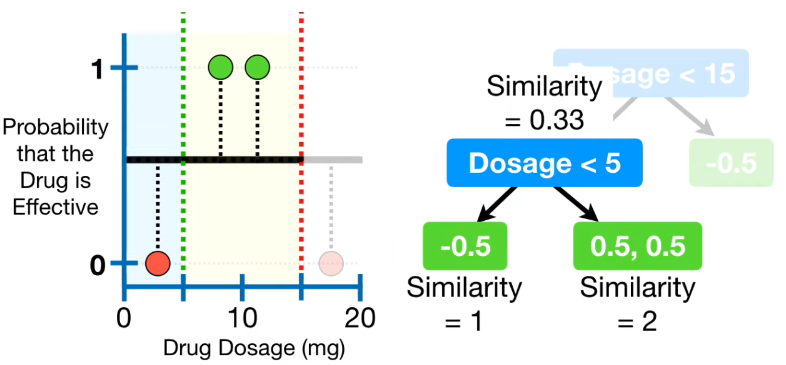

Now, since I'm limiting trees to **2** levels, we will not split leaves any further, and we are done building this tree.

**Note:** We stopped growing this tree because we limited the number of levels to **2**. However, **XGBoost** also has a threshold for the minimum number of **Residuals** in each leaf.

The minimum number of **Residuals** in each leaf is determined by calculating somthing called **Cover**. **Cover** is defined as the denominator of the **Similarity Score** minus $λ$. In other word, when we are using **XGBoost** for **Classification**,

$Cover = \sum [Previous \: Probability_i × (1 - Previous \: Probability_i)]$

By default, the minimum value for **Cover** is **1**. It can be understood with a little precision, if we used the default minimum value for **Cover**, **1**, then we would be left with the **Root**, and **XGBoost** requires trees to be larger than just the **Root**. So, in order to prevent this from being the worst example ever, let's set the minimum value for **Cover = 0**. That means setting the **min_child_weight** parameter equal to **0**.

Now we need to talk about how to **Prune** this tree. We **Prune** an **XGBoost Tree** by calculating the difference between the **Gain** associated with the lowest branch and a number we pick for $γ$. If the difference between the **Gain** and $γ$ in **negetive**, we will remove the branch and if the difference between the **Gain** and $γ$ is **positive** we will not remove the branch. For example, if we plugged in the **Gain** and set $γ = 2$, 2.66 - 2 = 0.66, then we would not prune because the difference is a **positive** number.

Now, We will determine the **Output Values** for the leaves. For **Classification**, the **Output Value** for a leaf is

$Output \: Value = \frac{\sum Residual_i}{\sum [Previous \: Probability_i × (1 - Previous \: Probability_i)] + λ}$

So for the left leaf, we plug in **Residual**, **-0.5**, and the value for the **Regularization Parameter**, $λ$. For now, we'll let $λ = 0$, because this is the default value, then there is no **Regularization** and the **Output Value = -2**.

$Output \: Value = \frac{-0.5}{0.5 × (1 - 0.5) + 0} = -2$

When $λ > 0$, then it reduces the amount that each observatoin adds to the new prediction. Thus, $λ$, the **Regularization Parameter**, reduces the prediction's sensitivity to isolated observations.

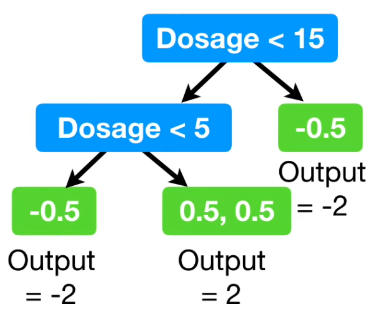

Now that we have built the first tree, we can make new **Predictions**. Just like **Gradient Boost**, **XGBoost** makes new predictions by starting with the initial prediction.

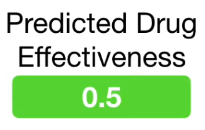

However, we need to convert this probability to a **log(odds)** value. The formula that converts probability to **odds** is

$\frac{p}{1 - p} = odds$

we can get the formula that converts probabilities to the **log(odds)** bay taking the log of both sides.

$log(\frac{p}{1 - p}) = log(odds)$

In this case, we plug in **p = 0.5** and we see that **log(odds) = 0**

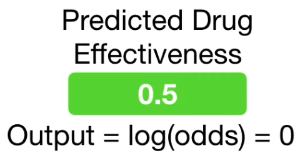

Now, just like **Gradient Boost**, we add the **log(odds)** of the initial prediction to the output of the **Tree**, scaled by a **Learning Rate**. **XGBoost** calls the **Learning Rate** **ϵ** and the default value is **0.3**.

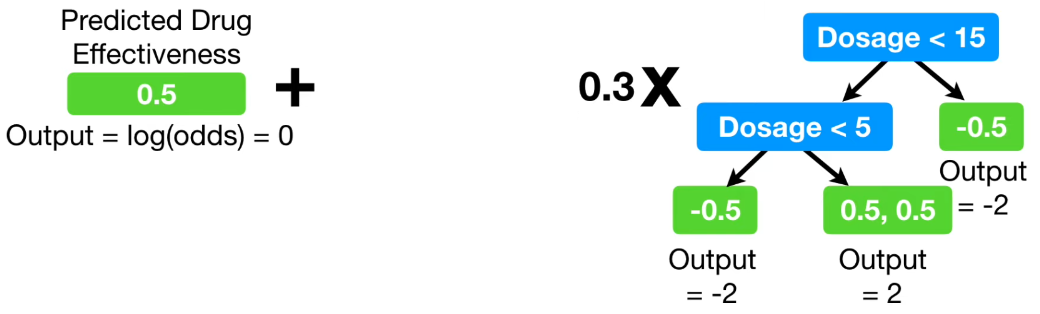

Thus, the new **Prediction** value for the observation with **Dosage = 2**, is the **log(odds)** of orginal prediction, **0**, plus the **Learning Rate**, **0.3**, times the **Output Value**, **-2**, and that gives us a **log(odds)** value = **-0.6**.

$log(odds) \: Prediction = 0 + (0.3 × -2)= -0.6$

To convert a **log(odds)** value into a probability, we plug it into the **Logistic Function**.

$Probability = \frac{e^{log(odds)}}{1 + e^{log(odds)}} = \frac{e^{-0.6}}{1 + e^{-0.6}} = 0.35$

And the new predicted probability is **0.35**.

Now let's make a new prediction for all the observations.

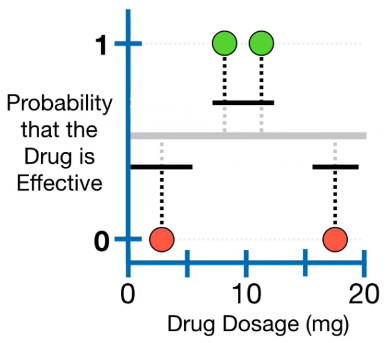

The new **Residuals** are smaller than before, so we have taken a small step in the right direction.

Now that we have new **Residuals**, we can build a second tree that is fit to the new **Residuals**.

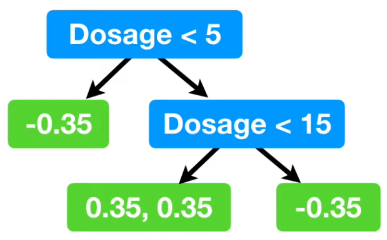

Now that we have a new tree, we add it to all of the previous predictoins and make new predictions that give us even smaller **Residuals**. Then we build another tree based on the new **Residuals** and we keep building trees until the **Residuals** are super small, or we have reached the maximum number of trees.

source: https://statquest.org/

## Model

### Import the necessary libraries for XGBoost Example

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### 2. Import the data

In [ ]:
df = pd.read_csv(project_dir + 'Telcom.csv')

In [ ]:
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

### 3. Data exploration

In [ ]:
df.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'],
        axis=1, inplace=True)
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...   

  Device Protection Tech Support Streaming TV  Streaming Movies  \
0                No           No           No                No   
1                No           No           No                No   
2               Yes           No          Yes               Yes   
3               Yes          Yes          Yes               Yes   
4               Yes           No          Yes               Yes   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes               Mailed check   
1  Month-to-month               Yes           Electronic check   
2  Month-to-month               Yes           Electronic check   
3  Month-to-month               Yes           Electronic check   
4  Month-to-month               Yes  Bank transfer (automatic)   

  Monthly Charges Total Charges Churn Value  
0           53.85        108.15           1  
1           70.70        151.65           1  
2           99.65         820.5           1  
3          104.80       3046.05           1  
4          103.70        5036.3           1  

[5 rows x 29 columns]

In [ ]:
df['Count'].unique()

array([1])

In [ ]:
df['Country'].unique()

array(['United States'], dtype=object)

In [ ]:
df['State'].unique()

array(['California'], dtype=object)

In [ ]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [ ]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long'],
        axis=1, inplace=True)
df.head()

City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
0  Los Angeles     90003  33.964131 -118.272783    Male             No   
1  Los Angeles     90005  34.059281 -118.307420  Female             No   
2  Los Angeles     90006  34.048013 -118.293953  Female             No   
3  Los Angeles     90010  34.062125 -118.315709  Female             No   
4  Los Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service  ... Device Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method Monthly Charges Total Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65         820.5   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

In [ ]:
df['City'].replace(' ', '_', regex=True, inplace=True)
df.head()

City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service  ... Device Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method Monthly Charges Total Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65         820.5   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

In [ ]:
df['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Device_Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech_Support Streaming_TV Streaming_Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless_Billing             Payment_Method Monthly_Charges Total_Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65         820.5   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn_Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

In [ ]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [ ]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Total_Charges'].unique()

array(['108.15', '151.65', '820.5', ..., '7362.9', '346.45', '6844.5'],
      dtype=object)

In [ ]:
len(df.loc[df['Total_Charges'] == ' '])

11

In [ ]:
df.loc[df['Total_Charges'] == ' ']

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
2234  San_Bernardino     92408  34.084909 -117.258107  Female             No   
2438    Independence     93526  36.869584 -118.189241    Male             No   
2568       San_Mateo     94401  37.590421 -122.306467  Female             No   
2667       Cupertino     95014  37.306612 -122.080621    Male             No   
2856        Redcrest     95569  40.363446 -123.835041  Female             No   
4331     Los_Angeles     90029  34.089953 -118.294824    Male             No   
4687        Sun_City     92585  33.739412 -117.173334    Male             No   
5104      Ben_Lomond     95005  37.078873 -122.090386  Female             No   
5719        La_Verne     91750  34.144703 -117.770299    Male             No   
6772            Bell     90201  33.970343 -118.171368  Female             No   
6840      Wilmington     90744  33.782068 -118.262263    Male             No   

     Partner Dependents  Tenure_Months Phone_Service  ...  \
2234     Yes         No              0            No  ...   
2438      No         No              0           Yes  ...   
2568     Yes         No              0           Yes  ...   
2667     Yes        Yes              0           Yes  ...   
2856     Yes         No              0            No  ...   
4331     Yes        Yes              0           Yes  ...   
4687     Yes        Yes              0           Yes  ...   
5104     Yes        Yes              0           Yes  ...   
5719     Yes        Yes              0           Yes  ...   
6772     Yes        Yes              0           Yes  ...   
6840      No        Yes              0           Yes  ...   

        Device_Protection         Tech_Support         Streaming_TV  \
2234                  Yes                  Yes                  Yes   
2438  No internet service  No internet service  No internet service   
2568                  Yes                   No                  Yes   
2667  No internet service  No internet service  No internet service   
2856                  Yes                  Yes                  Yes   
4331  No internet service  No internet service  No internet service   
4687  No internet service  No internet service  No internet service   
5104  No internet service  No internet service  No internet service   
5719  No internet service  No internet service  No internet service   
6772                  Yes                  Yes                  Yes   
6840                   No                  Yes                   No   

         Streaming_Movies  Contract Paperless_Billing  \
2234                   No  Two year               Yes   
2438  No internet service  Two year                No   
2568                  Yes  Two year                No   
2667  No internet service  Two year                No   
2856                   No  Two year                No   
4331  No internet service  Two year                No   
4687  No internet service  Two year                No   
5104  No internet service  Two year                No   
5719  No internet service  One year               Yes   
6772                   No  Two year                No   
6840                   No  Two year               Yes   

                 Payment_Method Monthly_Charges Total_Charges Churn_Value  
2234  Bank transfer (automatic)           52.55                         0  
2438               Mailed check           20.25                         0  
2568               Mailed check           80.85                         0  
2667               Mailed check           25.75                         0  
2856    Credit card (automatic)           56.05                         0  
4331               Mailed check           19.85                         0  
4687               Mailed check           25.35                         0  
5104               Mailed check           20.00                         0  
5719               Mailed check           19.70                         0  
6772               Maile

In [ ]:
df.loc[(df['Total_Charges'] == ' '), 'Total_Charges'] = 0

In [ ]:
df.loc[df['Tenure_Months'] == 0]

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
2234  San_Bernardino     92408  34.084909 -117.258107  Female             No   
2438    Independence     93526  36.869584 -118.189241    Male             No   
2568       San_Mateo     94401  37.590421 -122.306467  Female             No   
2667       Cupertino     95014  37.306612 -122.080621    Male             No   
2856        Redcrest     95569  40.363446 -123.835041  Female             No   
4331     Los_Angeles     90029  34.089953 -118.294824    Male             No   
4687        Sun_City     92585  33.739412 -117.173334    Male             No   
5104      Ben_Lomond     95005  37.078873 -122.090386  Female             No   
5719        La_Verne     91750  34.144703 -117.770299    Male             No   
6772            Bell     90201  33.970343 -118.171368  Female             No   
6840      Wilmington     90744  33.782068 -118.262263    Male             No   

     Partner Dependents  Tenure_Months Phone_Service  ...  \
2234     Yes         No              0            No  ...   
2438      No         No              0           Yes  ...   
2568     Yes         No              0           Yes  ...   
2667     Yes        Yes              0           Yes  ...   
2856     Yes         No              0            No  ...   
4331     Yes        Yes              0           Yes  ...   
4687     Yes        Yes              0           Yes  ...   
5104     Yes        Yes              0           Yes  ...   
5719     Yes        Yes              0           Yes  ...   
6772     Yes        Yes              0           Yes  ...   
6840      No        Yes              0           Yes  ...   

        Device_Protection         Tech_Support         Streaming_TV  \
2234                  Yes                  Yes                  Yes   
2438  No internet service  No internet service  No internet service   
2568                  Yes                   No                  Yes   
2667  No internet service  No internet service  No internet service   
2856                  Yes                  Yes                  Yes   
4331  No internet service  No internet service  No internet service   
4687  No internet service  No internet service  No internet service   
5104  No internet service  No internet service  No internet service   
5719  No internet service  No internet service  No internet service   
6772                  Yes                  Yes                  Yes   
6840                   No                  Yes                   No   

         Streaming_Movies  Contract Paperless_Billing  \
2234                   No  Two year               Yes   
2438  No internet service  Two year                No   
2568                  Yes  Two year                No   
2667  No internet service  Two year                No   
2856                   No  Two year                No   
4331  No internet service  Two year                No   
4687  No internet service  Two year                No   
5104  No internet service  Two year                No   
5719  No internet service  One year               Yes   
6772                   No  Two year                No   
6840                   No  Two year               Yes   

                 Payment_Method Monthly_Charges Total_Charges Churn_Value  
2234  Bank transfer (automatic)           52.55             0           0  
2438               Mailed check           20.25             0           0  
2568               Mailed check           80.85             0           0  
2667               Mailed check           25.75             0           0  
2856    Credit card (automatic)           56.05             0           0  
4331               Mailed check           19.85             0           0  
4687               Mailed check           25.35             0           0  
5104               Mailed check           20.00             0           0  
5719               Mailed check           19.70             0           0  
6772               Maile

In [ ]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [ ]:
df.replace(' ', '_', regex=True, inplace=True)
df.head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Device_Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech_Support Streaming_TV Streaming_Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless_Billing             Payment_Method Monthly_Charges Total_Charges  \
0               Yes               Mailed_check           53.85        108.15   
1               Yes           Electronic_check           70.70        151.65   
2               Yes           Electronic_check           99.65        820.50   
3               Yes           Electronic_check          104.80       3046.05   
4               Yes  Bank_transfer_(automatic)          103.70       5036.30   

  Churn_Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

In [ ]:
df.size

169032

### 4. Split our data


In [ ]:
X = df.drop('Churn_Value', axis=1).copy()
X.head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Online_Backup  \
0      No         No              2           Yes  ...           Yes   
1      No        Yes              2           Yes  ...            No   
2      No        Yes              8           Yes  ...            No   
3     Yes        Yes             28           Yes  ...            No   
4      No        Yes             49           Yes  ...           Yes   

  Device_Protection Tech_Support Streaming_TV Streaming_Movies  \
0                No           No           No               No   
1                No           No           No               No   
2               Yes           No          Yes              Yes   
3               Yes          Yes          Yes              Yes   
4               Yes           No          Yes              Yes   

         Contract Paperless_Billing             Payment_Method  \
0  Month-to-month               Yes               Mailed_check   
1  Month-to-month               Yes           Electronic_check   
2  Month-to-month               Yes           Electronic_check   
3  Month-to-month               Yes           Electronic_check   
4  Month-to-month               Yes  Bank_transfer_(automatic)   

  Monthly_Charges Total_Charges  
0           53.85        108.15  
1           70.70        151.65  
2           99.65        820.50  
3          104.80       3046.05  
4          103.70       5036.30  

[5 rows x 23 columns]

In [ ]:
y = df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

### 5. We format the data with One-Hot Encoding

In [ ]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

In [ ]:
pd.get_dummies(X, columns=['Payment_Method']).head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Streaming_TV  \
0      No         No              2           Yes  ...           No   
1      No        Yes              2           Yes  ...           No   
2      No        Yes              8           Yes  ...          Yes   
3     Yes        Yes             28           Yes  ...          Yes   
4      No        Yes             49           Yes  ...          Yes   

  Streaming_Movies        Contract Paperless_Billing Monthly_Charges  \
0               No  Month-to-month               Yes           53.85   
1               No  Month-to-month               Yes           70.70   
2              Yes  Month-to-month               Yes           99.65   
3              Yes  Month-to-month               Yes          104.80   
4              Yes  Month-to-month               Yes          103.70   

  Total_Charges Payment_Method_Bank_transfer_(automatic)  \
0        108.15                                    False   
1        151.65                                    False   
2        820.50                                    False   
3       3046.05                                    False   
4       5036.30                                     True   

  Payment_Method_Credit_card_(automatic) Payment_Method_Electronic_check  \
0                                  False                           False   
1                                  False                            True   
2                                  False                            True   
3                                  False                            True   
4                                  False                           False   

  Payment_Method_Mailed_check  
0                        True  
1                       False  
2                       False  
3                       False  
4                       False  

[5 rows x 26 columns]

In [ ]:
X_encoded = pd.get_dummies(X, columns=['City',
                                       'Gender',
                                       'Senior_Citizen',
                                       'Partner',
                                       'Dependents',
                                       'Phone_Service',
                                       'Multiple_Lines',
                                       'Internet_Service',
                                       'Online_Security',
                                       'Online_Backup',
                                       'Device_Protection',
                                       'Tech_Support',
                                       'Streaming_TV',
                                       'Streaming_Movies',
                                       'Contract',
                                       'Paperless_Billing',
                                       'Payment_Method'])
X_encoded.head()

Zip_Code   Latitude   Longitude  Tenure_Months  Monthly_Charges  \
0     90003  33.964131 -118.272783              2            53.85   
1     90005  34.059281 -118.307420              2            70.70   
2     90006  34.048013 -118.293953              8            99.65   
3     90010  34.062125 -118.315709             28           104.80   
4     90015  34.039224 -118.266293             49           103.70   

   Total_Charges  City_Acampo  City_Acton  City_Adelanto  City_Adin  ...  \
0         108.15        False       False          False      False  ...   
1         151.65        False       False          False      False  ...   
2         820.50        False       False          False      False  ...   
3        3046.05        False       False          False      False  ...   
4        5036.30        False       False          False      False  ...   

   Streaming_Movies_Yes  Contract_Month-to-month  Contract_One_year  \
0                 False                     True              False   
1                 False                     True              False   
2                  True                     True              False   
3                  True                     True              False   
4                  True                     True              False   

   Contract_Two_year  Paperless_Billing_No  Paperless_Billing_Yes  \
0              False                 False                   True   
1              False                 False                   True   
2              False                 False                   True   
3              False                 False                   True   
4              False                 False                   True   

   Payment_Method_Bank_transfer_(automatic)  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                      True   

   Payment_Method_Credit_card_(automatic)  Payment_Method_Electronic_check  \
0                                   False                            False   
1                                   False                             True   
2                                   False                             True   
3                                   False                             True   
4                                   False                            False   

   Payment_Method_Mailed_check  
0                         True  
1                        False  
2                        False  
3                        False  
4                        False  

[5 rows x 1178 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

### 6.We Optimize our hyperparameters by Cross-Validation and GridSearch.

In [ ]:
param_grid = {
     'max_depth': [4],
     'learning_rate': [0.1, 0.5, 0.08],
     'gamma': [0.25],
     'reg_lambda': [10.0, 20, 100],
      'scale_pos_weight': [3]}

optimal_params = GridSearchCV(
     estimator=xgb.XGBClassifier(objective='binary:logistic',
                                 eval_metric="logloss",
                                 seed=42,
                                 subsample=0.9,
                                 colsample_bytree=0.5,
                                 early_stopping_rounds=8,
                                 use_label_encoder=False),
     param_grid=param_grid,
     scoring='roc_auc',
     verbose=0,
     n_jobs = 10,
     cv = 3,
 )

In [ ]:
optimal_params.fit(X_train,
                    y_train,
                    eval_set=[(X_test, y_test)],
                    verbose=False)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=8,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0.25], 'learning_rate': [0.1, 0.5, 0.08],
                         'max_depth': [4], 'reg_lambda': [10.0, 20, 100],
                         'scale_pos_weight': [3]},
             scoring='roc_auc')

In [ ]:
print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.08, 'max_depth': 4, 'reg_lambda': 20, 'scale_pos_weight': 3}


Our best hyperparameters:

gamma: 0.25 \\
learning_rate : 0.08 \\
max_depth: 4 \\
reg_lambda: 10.0 \\
scale_pos_weight: 3 \\


### 7. We now build our XGBoost Model

In [ ]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss",
                        gamma=0.25,
                        learning_rate=0.08,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False,
                         early_stopping_rounds=20,
)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.68630
[1]	validation_0-logloss:0.66350
[2]	validation_0-logloss:0.64398
[3]	validation_0-logloss:0.62728
[4]	validation_0-logloss:0.61220
[5]	validation_0-logloss:0.59792
[6]	validation_0-logloss:0.58653
[7]	validation_0-logloss:0.57550
[8]	validation_0-logloss:0.56556
[9]	validation_0-logloss:0.55727
[10]	validation_0-logloss:0.54993
[11]	validation_0-logloss:0.54230
[12]	validation_0-logloss:0.53664
[13]	validation_0-logloss:0.53125
[14]	validation_0-logloss:0.52638
[15]	validation_0-logloss:0.52223
[16]	validation_0-logloss:0.51904
[17]	validation_0-logloss:0.51538
[18]	validation_0-logloss:0.51144
[19]	validation_0-logloss:0.50800
[20]	validation_0-logloss:0.50526
[21]	validation_0-logloss:0.50258
[22]	validation_0-logloss:0.49981
[23]	validation_0-logloss:0.49764
[24]	validation_0-logloss:0.49547
[25]	validation_0-logloss:0.49398
[26]	validation_0-logloss:0.49244
[27]	validation_0-logloss:0.49066
[28]	validation_0-logloss:0.48915
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### 8. We test our XGBoost Model

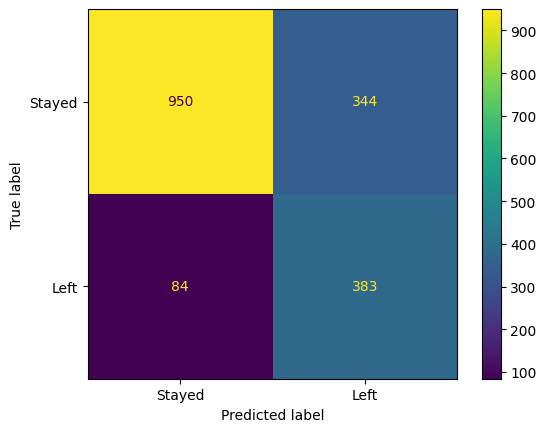

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_xgb,
                      X_test,
                      y_test,
                     values_format='d',
                      display_labels=["Stayed", "Left"])

In [ ]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss",
                        gamma=0.25,
                        learning_rate=0.08,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False,
                        early_stopping_rounds=10,
                            )
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.68630
[1]	validation_0-logloss:0.66350
[2]	validation_0-logloss:0.64398
[3]	validation_0-logloss:0.62728
[4]	validation_0-logloss:0.61220
[5]	validation_0-logloss:0.59792
[6]	validation_0-logloss:0.58653
[7]	validation_0-logloss:0.57550
[8]	validation_0-logloss:0.56556
[9]	validation_0-logloss:0.55727
[10]	validation_0-logloss:0.54993
[11]	validation_0-logloss:0.54230
[12]	validation_0-logloss:0.53664
[13]	validation_0-logloss:0.53125
[14]	validation_0-logloss:0.52638
[15]	validation_0-logloss:0.52223
[16]	validation_0-logloss:0.51904
[17]	validation_0-logloss:0.51538
[18]	validation_0-logloss:0.51144
[19]	validation_0-logloss:0.50800
[20]	validation_0-logloss:0.50526
[21]	validation_0-logloss:0.50258
[22]	validation_0-logloss:0.49981
[23]	validation_0-logloss:0.49764
[24]	validation_0-logloss:0.49547
[25]	validation_0-logloss:0.49398
[26]	validation_0-logloss:0.49244
[27]	validation_0-logloss:0.49066
[28]	validation_0-logloss:0.48915
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
explainer = shap.Explainer(clf_xgb)
shap_values = explainer(X_test)

### 9.The most important features

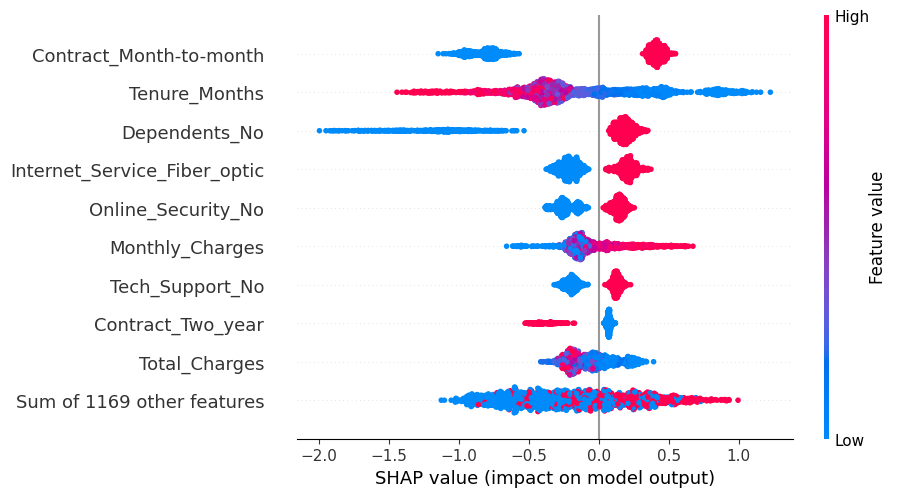

In [ ]:
shap.plots.beeswarm(shap_values)

# References

[1].Data Structures, Algorithms, and Machine Learning Optimization, Jon Krohn-June 2021. \\
[2]. Machine Learning With Go, Daniel Whitenack- September 2017. \\
[3].Machine Learning with scikit-learn Quick Start Guide, Kevin Jolly-October 2018. \\
[4].GitHub